# Trabalho 1

## Regressão Logística

### Ajuste da taxa de aprendizado e número de iterações

A primeira etada é ajustar a taxa de aprendizado e o número de iterações. Após alterar os outros hyperparameters (fator de regularização e grau dos atributos polinimiais) será necessário realizar o ajuste fino, mas será algum valor próximo ao encontrado nesta etapa.

** imports necessários: **

In [17]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
from experimentos import Dataset as DATASET
from experimentos import ModelSelection
from experimentos import Plot
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

** varia alpha e número de iterações e plota os gráficos: **

14 0.217154269411 0.034226939072
10 0.220049263099 0.0328356078293
6 0.227962639992 0.0304832245201


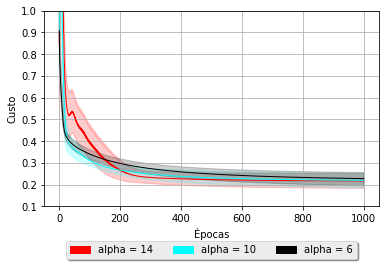

In [24]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

# normaliza
X_ =  DTS.dataset_scaling(X)

alphas = [14, 10, 6]
epochs = [1000]
Lambda = 0
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']
fold = 1
errors = {}
val_errors = {}
loss = {}
for train,val in MS.k_fold(X_, k=5, shuffle=True):
    fig, ax = plt.subplots()
    errors[str(fold)] = []
    val_errors[str(fold)] = []
    loss[str(fold)] = []
    for e in epochs:
        legends = []
        for i,a in enumerate(alphas):
            # ajusta o modelo
            RLR.fit(X_[train], Y[train], X_[val], Y[val], epochs=e, learning_rate=a, Lambda=Lambda, print_results=False)
            
            # calcula o erro no treino
            errors[str(fold)].append(RLR.train_error)
            # calcula o erro no teste
            val_errors[str(fold)].append(RLR.val_error)
            # salva loss
            loss[str(fold)].append(RLR.loss)
            
            ax.plot(range(e+1), RLR.loss, color=colors[i], linewidth=1)
            legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
        #title = u'Ajuste da taxa com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda) + ' (fold ' + str(fold) + ')'
        plt.ylim([0.1, 1])
        plt.xlabel(u'Épocas')
        plt.ylabel(u'Custo')
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
        box.width, box.height * 0.9])
        ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
        #plt.title(title)
        plt.grid(True)
    
        fig.savefig('fold' + str(fold) + '.eps')
        #plt.show()
        plt.close(fig)
        
        fold += 1
        
error = []        
val_error = []
loss_ = []
for k in ['1', '2', '3', '4','5']:
    error.append(errors[k])
    val_error.append(val_errors[k])
    loss_.append(loss[k])

fig, ax = plt.subplots()
for i,a in enumerate(alphas):
    mean = np.asarray(loss_).mean(axis=0)[i]
    stdeviation = np.asarray(loss_).std(axis=0)[i]
    print a, mean[-1], stdeviation[-1]
    
    ax.plot(range(epochs[0]+1), mean, color=colors[i], linewidth=1)
    ax.fill_between(range(epochs[0]+1), mean-stdeviation, mean+stdeviation , color=colors[i], linewidth=1, alpha=0.2)
    
title = u'Curva de aprendizado média com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda)
plt.ylim([0.1, 1.])
plt.xlabel(u'Épocas')
plt.ylabel(u'Custo')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('media_std_fino.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

** erro por época ** (pode ignorar)

In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro no treino'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_treino.eps')
plt.show()


In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(val_error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro na validacao'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_validacao.eps')
plt.show()

In [ ]:
# cada linha é um alpha, cada coluna uma época e cada valor é um erro binário médio dos k-folds
#print "erro medio no treino ", np.asarray(error).mean(axis=0).shape
#print "desvio padrao no treino ", np.asarray(error).std(axis=0)
#print "erro medio na validacao ", np.asarray(val_error).mean(axis=0).shape
#print "desvio padrao na validacao ", np.asarray(val_error).std(axis=0)

for i,a in enumerate(alphas):
    print "alpha = ", a
    print "erro medio final no treino ", np.asarray(error).mean(axis=0)[i][-1]
    print "desvio padrao final no treino ", np.asarray(error).std(axis=0)[i][-1]
    print "erro medio final na validacao ", np.asarray(val_error).mean(axis=0)[i][-1]
    print "desvio padrao final na validacao ", np.asarray(val_error).std(axis=0)[i][-1]
    print "\n"

### Curva de validação: atributos polinomiais

O objetivo deste experimento é analisar se a geração de atributos polinomiais trazem melhoria de
desempenho e, mais especificamente, qual o grau de polinômio mais adequado para a tarefa. Portanto,
deve-se variar o grau dos atributos polinomiais a partir de 1 (sem atributos polinomiais) até um valor que
a curva de validação indique claramente que há overfitting. Neste experimento, não utilize
regularização.

(200, 4)
(200, 14)
(200, 34)
(200, 69)
(200, 125)
(200, 209)
(200, 329)
(200, 494)
(200, 714)
(200, 1000)
(200, 1364)
(200, 1819)
(200, 2379)
(200, 3059)
(200, 3875)
(200, 4844)
(200, 5984)
(200, 7314)
(200, 8854)
(200, 10625)
(200, 12649)
(200, 14949)
(200, 17549)
(200, 20474)
(200, 23750)
(200, 27404)
(200, 31464)
(200, 35959)
(200, 40919)
(200, 46375)


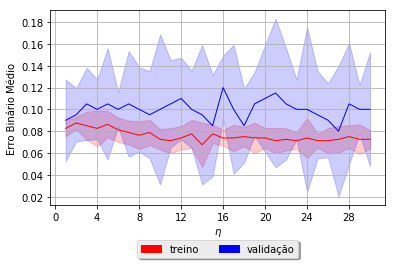

erro medio no treino:  [0.08249999999999999, 0.087500000000000022, 0.085000000000000006, 0.082500000000000018, 0.086249999999999979, 0.081250000000000003, 0.078749999999999987, 0.076249999999999971, 0.078750000000000014, 0.072499999999999981, 0.071250000000000008, 0.073749999999999982, 0.077499999999999986, 0.067499999999999977, 0.077500000000000013, 0.07375000000000001, 0.07375000000000001, 0.074999999999999997, 0.07375000000000001, 0.07375000000000001, 0.071250000000000008, 0.072500000000000009, 0.071249999999999994, 0.073749999999999982, 0.071249999999999994, 0.071250000000000008, 0.072499999999999981, 0.075000000000000025, 0.072500000000000009, 0.072499999999999981]

desvio padrao no treino:  [0.007288689868556646, 0.0055901699437494543, 0.012869537676233745, 0.016488632447841135, 0.012119199643540832, 0.011180339887498959, 0.010897247358851692, 0.012747548783981958, 0.011592023119369639, 0.0093541434669348559, 0.011592023119369639, 0.010752906583803288, 0.01286953767623375, 0.0203

In [25]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

degrees = range(1,31)
e = 1000
Lambda = 0
lr = 10
train_mean = []
train_std = []
val_mean = []
val_std = []

for d in degrees:
    X_pol = DTS.generate_polynomial_attributes(X, d)
    # normaliza
    X_pol =  DTS.dataset_scaling(X_pol)
    print X_pol.shape
    fold = 1
    errors = {}
    val_errors = {}
    loss = {}
    for train,val in MS.k_fold(X_pol, k=5, shuffle=True):
        errors[str(fold)] = []
        val_errors[str(fold)] = []
        loss[str(fold)] = []
        legends = []
        
        # ajusta o modelo
        RLR.fit(X_pol[train], Y[train], X_pol[val], Y[val], epochs=e, learning_rate=lr, Lambda=Lambda, print_results=False)

        # calcula o erro no treino
        errors[str(fold)].append(RLR.train_error[-1])
        # calcula o erro no teste
        val_errors[str(fold)].append(RLR.val_error[-1])
        # salva loss
        loss[str(fold)].append(RLR.loss)
        #print "erro no treino", RLR.train_error[-1]
        #print "erro na validacao", RLR.val_error[-1]
        fold += 1
        
    train_error = []        
    val_error = []
    loss_ = []
    for k in ['1', '2', '3', '4','5']:
        train_error.append(errors[k])
        val_error.append(val_errors[k])
        loss_.append(loss[k])

    #print "grau dos atributos polinomiais: ", d
    #print "erro médio no treino: ", np.asarray(train_error).mean()
    #print "erro médio na validação: ", np.asarray(val_error).mean()
    #print "\n"
    
    train_error = np.array(train_error)
    val_error = np.array(val_error)
    
    train_mean.append(train_error.mean())
    train_std.append(train_error.std())
    val_mean.append(val_error.mean())
    val_std.append(val_error.std())
    
fig, ax = plt.subplots()
ax.plot(range(1,len(degrees)+1), train_mean, color='red', linewidth=1)
ax.fill_between(range(1,len(degrees)+1), np.asarray(train_mean)-np.asarray(train_std), np.asarray(train_mean)+np.asarray(train_std) , color='red', linewidth=1, alpha=0.2)

ax.plot(range(1,len(degrees)+1), val_mean, color='blue', linewidth=1)
ax.fill_between(range(1,len(degrees)+1), np.asarray(val_mean)-np.asarray(val_std), np.asarray(val_mean)+np.asarray(val_std) , color='blue', linewidth=1, alpha=0.2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legends = [mpatches.Patch(color='red', label='treino'), mpatches.Patch(color='blue', label=u'validação')]

title = u'Curva de aprendizado média com #epocas = ' + str(e) + ', $\lambda$ = ' + str(Lambda) + ' e $\alpha$ = ' + str(lr)
#plt.ylim([0.1, 1.])
plt.xlabel('$\eta$')
plt.ylabel(u'Erro Binário Médio')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('curva_ap_eta.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

print "erro medio no treino: ", train_mean
print
print "desvio padrao no treino: ", train_std
print
print "erro medio na validacao: ", val_mean
print
print "desvio padrao: ", val_std